In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '953cf27b-79db-4d43-9883-939fafe349ba',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
import pandas as pd

In [3]:
pd.set_option("display.max.columns",37)
pd.set_option("display.max_rows", 12)
df=pd.json_normalize(data["data"])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11919,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982007e+07,1.982007e+07,False,NaN,1,NaN,NaN,None,2025-02-05T18:00:00.000Z,97581.769560,5.701199e+10,-20.2314,-0.436435,-1.642238,-4.758034,-4.144890,-2.146595,27.661593,1.934078e+12,60.6387,2.049217e+12,None,2025-02-05T18:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 19:01:45.210126
1,1027,Ethereum,ETH,ethereum,9917,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205263e+08,1.205263e+08,True,NaN,2,NaN,NaN,None,2025-02-05T18:01:00.000Z,2746.281620,3.812153e+10,-19.6163,-1.087222,-2.446496,-11.620294,-25.088018,-31.292401,-4.216696,3.309991e+11,10.3771,3.309991e+11,None,2025-02-05T18:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 19:01:45.210126
2,825,Tether USDt,USDT,tether,115555,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.404787e+11,1.425729e+11,True,NaN,3,NaN,NaN,None,2025-02-05T18:01:00.000Z,0.999954,1.211089e+11,-21.5138,-0.023467,-0.055819,-0.013054,-0.016117,-0.098996,-0.126338,1.404723e+11,4.4030,1.425664e+11,None,2025-02-05T18:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-05 19:01:45.210126
3,52,XRP,XRP,xrp,1522,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.770373e+10,9.998654e+10,False,NaN,4,NaN,NaN,None,2025-02-05T18:01:00.000Z,2.396969,9.484286e+09,-32.8117,-2.537980,-8.804921,-21.238469,-0.738185,-3.821144,332.026639,1.383141e+11,4.3353,2.396969e+11,None,2025-02-05T18:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 19:01:45.210126
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.870479e+08,5.933874e+08,True,NaN,5,NaN,NaN,None,2025-02-05T18:01:00.000Z,197.677487,5.155759e+09,-30.2592,-1.181380,-7.611162,-13.666257,-9.579943,-18.043968,0.674256,9.627840e+10,3.0178,1.172993e+11,None,2025-02-05T18:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 19:01:45.210126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1975,Chainlink,LINK,chainlink,1924,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, eth...",NaN,6.381000e+08,1.000000e+09,False,NaN,11,NaN,NaN,None,2025-02-05T18:01:00.000Z,19.128940,8.049576e+08,-31.8462,-1.704616,-6.969666,-16.502675,-20.007937,-22.258282,53.242136,1.220618e+10,0.3827,1.912894e+10,None,2025-02-05T18:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-02-05 19:01:45.210126
11,5805,Avalanche,AVAX,avalanche,857,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.157487e+08,4.117727e+08,4.501090e+08,False,NaN,12,NaN,NaN,None,2025-02-05T18:01:00.000Z,25.775123,4.866724e+08,-31.2725,-1.840246,-4.821489,-21.242300,-41.483364,-50.404720,-6.787928,1.061349e+10,0.3327,1.844851e+10,None,2025-02-05T18:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 19:01:45.210126
12,20947,Sui,SUI,sui,551,2022-07-12T08:03:11.000Z,"[binance-launchpool, coinbase-ventures-portfol...",1.000000e+10,3.089707e+09,1.000000e+10,False,NaN,13,3.089707e+09,1.037286e+10,None,2025-02-05T18:01:00.000Z,3.357232,1.771719e+09,-18.3698,-2.343406,-9.288752,-9.601679,-35.750430,-20.601391,43.40

In [4]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '953cf27b-79db-4d43-9883-939fafe349ba',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
       print(e)
    pd.set_option("display.max.columns",37)
    pd.set_option("display.max_rows", 15)
    df2=pd.json_normalize(data["data"])
    df2['timestamp']=pd.to_datetime('now')
    df=pd.concat([df,df2])
    if not os.path.isfile(r'C:\Users\alaak\OneDrive\Bureau\jupyter\APIS\API.csv'):
        df.to_csv(r'C:\Users\alaak\OneDrive\Bureau\jupyter\APIS\API.csv', header=True)
    else:
        df.to_csv(r'C:\Users\alaak\OneDrive\Bureau\jupyter\APIS\API.csv', mode='a', header =False)
        

In [5]:
import os 
from time import time 
from time import sleep
for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(60) #sleep for one minute
exit()

API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully


KeyboardInterrupt: 

In [6]:
df3=pd.read_csv(r"C:\Users\alaak\OneDrive\Bureau\jupyter\APIS\API.csv")
df3


C:\Users\alaak\AppData\Local\Temp\ipykernel_21520\4196035008.py:1: DtypeWarning: Columns (0,1,11,13,15,16,18,19,21,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv(r"C:\Users\alaak\OneDrive\Bureau\jupyter\APIS\API.csv")


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,...,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11798.0,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.978072e+07,1.978072e+07,False,NaN,1,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,64.5774,0.734625,3.289351,19.337086,30.396175,41.305058,39.653069,1622358546410.525879,58.1646,1.722360e+12,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
1,1,1027,Ethereum,ETH,ethereum,9518.0,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204238e+08,1.204238e+08,True,NaN,2,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,36.2918,1.021455,0.139698,29.484096,30.266687,35.813744,21.60086,384540759787.029419,13.7865,3.845408e+11,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
2,2,825,Tether USDt,USDT,tether,102947.0,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.233864e+11,1.248354e+11,True,NaN,3,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,78.3307,-0.021094,0.028958,0.163796,0.095667,0.078875,0.001986,123470013752.900558,4.4266,1.249200e+11,NaN,2024-11-11T10:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-11 11:34:10.468619
3,3,5426,Solana,SOL,solana,785.0,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.719374e+08,5.882276e+08,True,NaN,4,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,84.6617,1.703122,4.419985,31.07216,46.542563,59.069445,48.032763,101012134160.234314,3.6215,1.259026e+11,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
4,4,1839,BNB,BNB,bnb,2275.0,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440993e+08,1.440993e+08,False,NaN,5,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,25.3251,0.834987,-1.188790,11.722541,8.51038,14.895171,19.864523,90266105335.242142,3.2381,9.026611e+10,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114851,10,1975,Chainlink,LINK,chainlink,1924.0,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,6.381000e+08,1.000000e+09,False,NaN,11,NaN,NaN,NaN,2025-02-05T18:03:00.000Z,...,-31.5445,-1.682123,-6.928232,-16.246458,-19.919605,-22.407526,53.402614,12212606289.671185,0.3832,1.913902e+10,NaN,2025-02-05T18:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-02-05 19:04:46.583003
114852,11,5805,Avalanche,AVAX,avalanche,857.0,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",7.157487e+08,4.117727e+08,4.501090e+08,False,NaN,12,NaN,NaN,NaN,2025-02-05T18:03:00.000Z,...,-31.0431,-1.744597,-4.754426,-21.002171,-41.391723,-50.469945,-6.82807,10622108559.237816,0.3332,1.846349e+10,NaN,2025-02-05T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 19:04:46.583003
114853,12,20947,Sui,SUI,sui,551.0,2022-07-12T08:03:11.000Z,"['binance-launchpool', 'coinbase-ventures-port...",1.000000e+10,3.089707e+09,1.000000e+10,False,NaN,13,3.089707e+09,10379862237.015177,NaN,2025-02-05T18:03:00.000Z,...,-18.2610,-2.198963,-9.367519,-9.304314,-35.728623,-20.559786,43.565965,10379862237.015177,0.3257,3.359497e+10,NaN,2025-02-05T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 19:04:46.583003
114854,

In [7]:
pd.set_option('display.float.format',lambda x: '%.5f' %x)

In [8]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,...,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11798.00000,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19780725.00000,19780725.00000,False,NaN,1,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,64.57740,0.73463,3.28935,19.33709,30.39618,41.30506,39.65307,1622358546410.52588,58.16460,1722359998160.88989,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
1,1,1027,Ethereum,ETH,ethereum,9518.00000,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120423803.88992,120423803.88992,True,NaN,2,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,36.29180,1.02146,0.13970,29.48410,30.26669,35.81374,21.60086,384540759787.02942,13.78650,384540759787.03003,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
2,2,825,Tether USDt,USDT,tether,102947.00000,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,123386401199.98550,124835400522.33640,True,NaN,3,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,78.33070,-0.02109,0.02896,0.16380,0.09567,0.07888,0.00199,123470013752.90056,4.42660,124919994986.80000,NaN,2024-11-11T10:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-11 11:34:10.468619
3,3,5426,Solana,SOL,solana,785.00000,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,471937372.03149,588227563.88656,True,NaN,4,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,84.66170,1.70312,4.41999,31.07216,46.54256,59.06944,48.03276,101012134160.23431,3.62150,125902556401.25999,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
4,4,1839,BNB,BNB,bnb,2275.00000,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144099334.29648,144099334.29648,False,NaN,5,NaN,NaN,NaN,2024-11-11T10:32:00.000Z,...,25.32510,0.83499,-1.18879,11.72254,8.51038,14.89517,19.86452,90266105335.24214,3.23810,90266105335.24001,NaN,2024-11-11T10:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-11 11:34:10.468619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114851,10,1975,Chainlink,LINK,chainlink,1924.00000,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,638099970.45279,1000000000.00000,False,NaN,11,NaN,NaN,NaN,2025-02-05T18:03:00.000Z,...,-31.54450,-1.68212,-6.92823,-16.24646,-19.91960,-22.40753,53.40261,12212606289.67118,0.38320,19139017168.43000,NaN,2025-02-05T18:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-02-05 19:04:46.583003
114852,11,5805,Avalanche,AVAX,avalanche,857.00000,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,411772672.18748,450108972.18748,False,NaN,12,NaN,NaN,NaN,2025-02-05T18:03:00.000Z,...,-31.04310,-1.74460,-4.75443,-21.00217,-41.39172,-50.46994,-6.82807,10622108559.23782,0.33320,18463489949.36000,NaN,2025-02-05T18:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-05 19:04:46.583003
114853,12,20947,Sui,SUI,sui,551.00000,2022-07-12T08:03:11.000Z,"['binance-launchpool', 'coinbase-ventures-port...",10000000000.00000,3089707194.50889,10000000000.00000,False,NaN,13,3089707194.50889,10379862237.01518,NaN,2025-02-05T18:03:00.000Z,...,-18.26100,-2.19896,-9.36752,-9.30431,-35.72862,-20.55979,43.56597,103798622

In [11]:
cols = ['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 
        'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 
        'quote.USD.percent_change_60d']

df3[cols] = df3[cols].apply(pd.to_numeric, errors='coerce')

# Effectuer le groupby et calculer la moyenne
df4 = df3.groupby('name', sort=False)[cols].mean()

In [12]:
df5=df4.stack()
pd.set_option('display.max.rows',None)
print(df5)

name                                     
Bitcoin      quote.USD.percent_change_1h      0.08119
             quote.USD.percent_change_24h     0.77605
             quote.USD.percent_change_7d     17.82974
             quote.USD.percent_change_30d    35.24877
             quote.USD.percent_change_60d    46.65846
Ethereum     quote.USD.percent_change_1h     -0.22009
             quote.USD.percent_change_24h    -3.09595
             quote.USD.percent_change_7d     20.10512
             quote.USD.percent_change_30d    24.36541
             quote.USD.percent_change_60d    30.75174
Tether USDt  quote.USD.percent_change_1h      0.02218
             quote.USD.percent_change_24h     0.07287
             quote.USD.percent_change_7d      0.08388
             quote.USD.percent_change_30d     0.20033
             quote.USD.percent_change_60d     0.09766
Solana       quote.USD.percent_change_1h     -0.21481
             quote.USD.percent_change_24h    -1.42416
             quote.USD.percent_change_7d

In [13]:
df6=df5.to_frame(name='values')

In [14]:
# index=pd.Index(range(75))
# df6
df6.reset_index(inplace=True)
df6.rename(columns={'level_1':'percent change'},inplace=True)
df6

,name,percent change,values
0,Bitcoin,quote.USD.percent_change_1h,0.08119
1,Bitcoin,quote.USD.percent_change_24h,0.77605
2,Bitcoin,quote.USD.percent_change_7d,17.82974
3,Bitcoin,quote.USD.percent_change_30d,35.24877
4,Bitcoin,quote.USD.percent_change_60d,46.65846
5,Ethereum,quote.USD.percent_change_1h,-0.22009
6,Ethereum,quote.USD.percent_change_24h,-3.09595
7,Ethereum,quote.USD.percent_change_7d,20.10512
8,Ethereum,quote.USD.percent_change_30d,24.36541
9,Ethereum,quote.USD.percent_change_60d,30.75174


In [15]:
df6['percent change'] = df6['percent change'].str.replace('quote.USD.percent_change_', '', regex=False)
df6[df6['values']<0]

,name,percent change,values
5,Ethereum,1h,-0.22009
6,Ethereum,24h,-3.09595
15,Solana,1h,-0.21481
16,Solana,24h,-1.42416
21,BNB,24h,-2.66752
25,Dogecoin,1h,-0.56872
26,Dogecoin,24h,-0.67529
32,USDC,7d,-0.01238
34,USDC,60d,-0.00432
35,XRP,1h,-0.03045


In [16]:
df6['values'] = pd.to_numeric(df6['values'], errors='coerce')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 15000x3500 with 0 Axes>

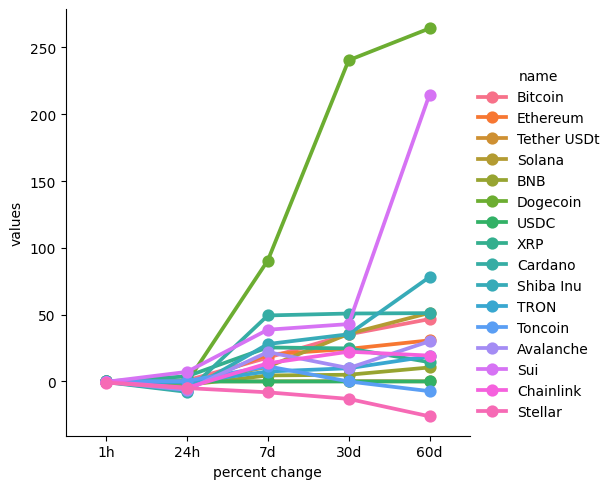

In [18]:
plt.figure(figsize=(150, 35))
sns.catplot(x='percent change', y='values', hue='name', data=df6, kind='point')
plt.show()

In [21]:
pd.set_option('display.max.columns',38)
df3.head(5)
df7=df3[['name','quote.USD.price','timestamp']]
df_bitcoin=df7[df7['name']=='Bitcoin']
df_bitcoin=df_bitcoin.drop_duplicates(subset='quote.USD.price')
df_bitcoin['timestamp'] = pd.to_datetime(df_bitcoin['timestamp'])
df_bitcoin['timestamp']=df_bitcoin['timestamp'].dt.strftime('%H:%M')

(81968.62721988272, 102246.923308292)

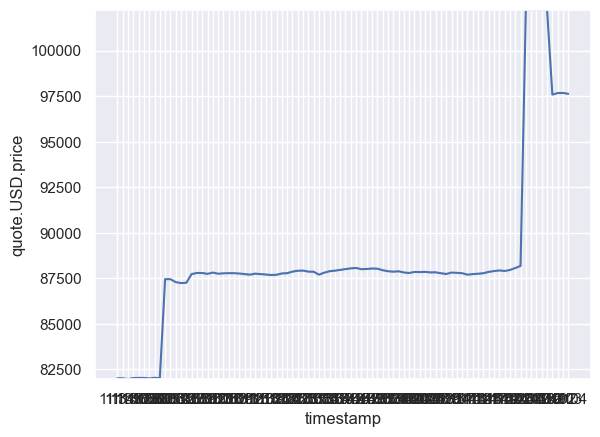

In [27]:
df_bitcoin['quote.USD.price'] = pd.to_numeric(df_bitcoin['quote.USD.price'], errors='coerce')
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp',y='quote.USD.price',data=df_bitcoin)
plt.ylim(df_bitcoin['quote.USD.price'].min() - 1, df_bitcoin['quote.USD.price'].max() + 1)